In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import zipfile
from datetime import datetime as dt
import pickle

#importing dtale for visual assessment
import dtale
%matplotlib inline

#machine learning related libraries
from sklearn.model_selection import train_test_split

#import algorithm
from sklearn.linear_model import LogisticRegression
from sklearn .tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#import evaluation metrics
from sklearn import metrics

#Deep learning - Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = zipfile.ZipFile('churn.zip')

In [3]:
df.namelist()


['Bank Customer Churn Prediction.csv']

In [4]:
df = pd.read_csv(zipfile.ZipFile('churn.zip').open('Bank Customer Churn Prediction.csv'))

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
#This gives us the statistical summary of our data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [8]:
#checking for an missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [10]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [11]:
countries = pd.get_dummies(df['country'])#it wil be useful in our model

In [12]:
countries

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [13]:
genders = pd.get_dummies(df['gender'])#it wil be useful in our model

In [14]:
genders

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [15]:
df = pd.concat([df , countries, genders],axis = 1)

In [16]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [17]:
df.drop(['country' ,'gender', 'customer_id'] , axis = 1, inplace = True)

In [18]:
df.dtypes

credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
France                uint8
Germany               uint8
Spain                 uint8
Female                uint8
Male                  uint8
dtype: object

In [19]:
df.corr()['churn']

credit_score       -0.027094
age                 0.285323
tenure             -0.014001
balance             0.118533
products_number    -0.047820
credit_card        -0.007138
active_member      -0.156128
estimated_salary    0.012097
churn               1.000000
France             -0.104955
Germany             0.173488
Spain              -0.052667
Female              0.106512
Male               -0.106512
Name: churn, dtype: float64

<AxesSubplot:>

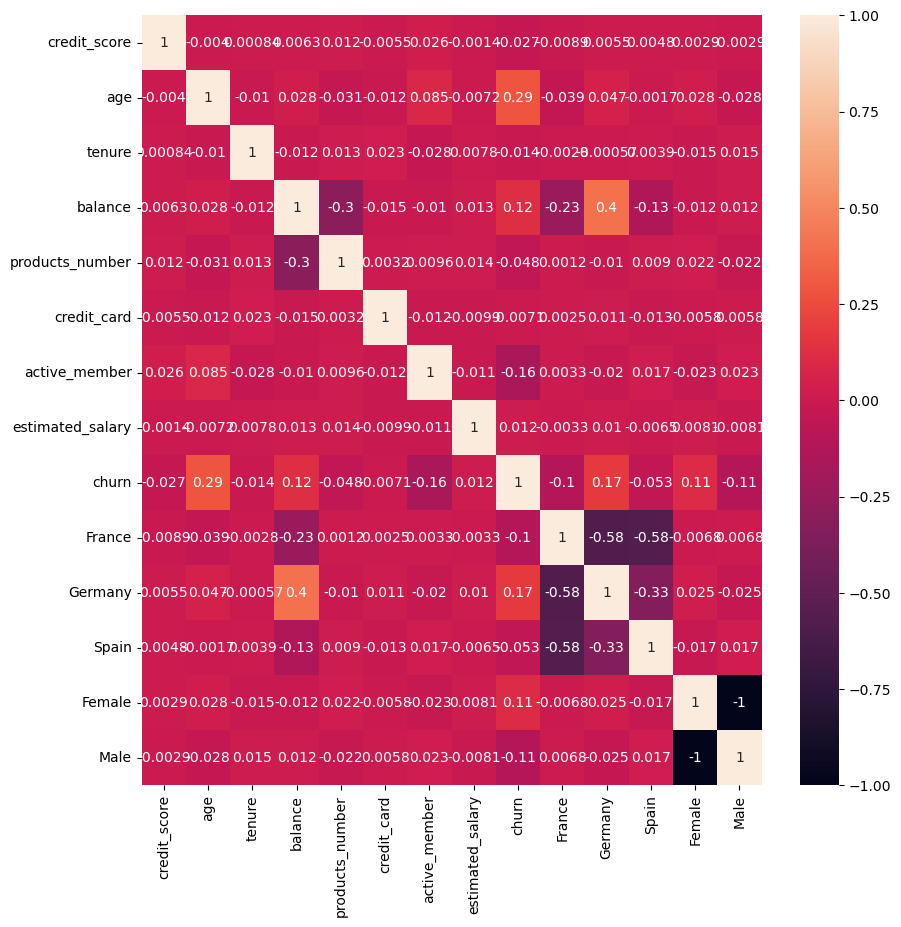

In [20]:
plt.figure(figsize =(10,10))
sb.heatmap(df.corr(), annot = True)

In [21]:
X = df.drop('churn' , axis = 1).values
y = df['churn']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [23]:
X_train

array([[638.,  36.,   6., ...,   0.,   1.,   0.],
       [769.,  38.,   6., ...,   1.,   0.,   1.],
       [803.,  42.,   5., ...,   0.,   0.,   1.],
       ...,
       [716.,  41.,   8., ...,   0.,   0.,   1.],
       [578.,  32.,   4., ...,   0.,   0.,   1.],
       [653.,  30.,   2., ...,   1.,   1.,   0.]])

In [24]:
y_train

9403    0
7054    0
1085    1
8907    0
4155    0
       ..
599     0
5695    0
8006    0
1361    0
1547    0
Name: churn, Length: 6700, dtype: int64

### logistic Regression

In [25]:
logmodel = LogisticRegression()

In [26]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [27]:
logprediction = logmodel.predict(X_test)

In [28]:
print(metrics.accuracy_score(y_test , logprediction))

0.7824242424242425


In [29]:
print(metrics.confusion_matrix(y_test , logprediction))

[[2543   77]
 [ 641   39]]


### DecisionTreeClassifier

In [30]:
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
dtprediction = dtree.predict(X_test)

In [33]:
print(metrics.accuracy_score(y_test , dtprediction))

0.7996969696969697


### RandomForestClassifier

In [34]:
rfmodel = RandomForestClassifier()

In [35]:
rfmodel.fit(X_train , y_train)

RandomForestClassifier()

In [36]:
rfprediction = rfmodel.predict(X_test)

In [37]:
print(metrics.accuracy_score(y_test , rfprediction))

0.8572727272727273


# Deep learning - Tensorflow

In [38]:
#conda install tensorflow

In [39]:
#initiate a model
tfmodel = Sequential()
#add input layer
tfmodel.add(Dense(units = 13,activation ='relu'))

#add the hidden layer
tfmodel.add(Dense(units = 7,activation ='relu'))
tfmodel.add(Dense(units = 4,activation ='relu'))

#add the output layer
tfmodel.add(Dense(units = 1, activation = 'sigmoid'))#sigmoid returns value between 0 and 1

#compile the model ready for training
tfmodel.compile(loss='binary_crossentropy', optimizer='adam')#optimiser reduces errors in a model

In [40]:
tfmodel.fit(x = X_train , y = y_train, epochs =70,validation_data =(X_test,y_test))# epochs actually allows our deep learning to interprete our model for a number of times before training
                                                # this is for best accuracy. your epochs must be balanced

Epoch 1/70
210/210 [==============================] - 4s 9ms/step - loss: 287.1765 - val_loss: 10.2406
Epoch 2/70
210/210 [==============================] - 1s 3ms/step - loss: 1.9324 - val_loss: 0.6267
Epoch 3/70
210/210 [==============================] - 1s 3ms/step - loss: 0.6061 - val_loss: 0.5862
Epoch 4/70
210/210 [==============================] - 1s 3ms/step - loss: 0.5713 - val_loss: 0.5590
Epoch 5/70
210/210 [==============================] - 1s 3ms/step - loss: 0.5485 - val_loss: 0.5417
Epoch 6/70
210/210 [==============================] - 1s 3ms/step - loss: 0.5328 - val_loss: 0.5296
Epoch 7/70
210/210 [==============================] - 1s 4ms/step - loss: 0.5224 - val_loss: 0.5214
Epoch 8/70
210/210 [==============================] - 1s 4ms/step - loss: 0.5154 - val_loss: 0.5164
Epoch 9/70
210/210 [==============================] - 1s 3ms/step - loss: 0.5107 - val_loss: 0.5131
Epoch 10/70
210/210 [==============================] - 1s 4ms/step - loss: 0.5078 - val_loss: 0.5

In [41]:
#check for overfitting

In [42]:
tfmodel.history.history

{'loss': [287.1765441894531,
  1.932350754737854,
  0.606060266494751,
  0.5713151693344116,
  0.5484881401062012,
  0.5327834486961365,
  0.5223968029022217,
  0.5154035091400146,
  0.5107360482215881,
  0.507838249206543,
  0.5061315298080444,
  0.5050980448722839,
  0.504523515701294,
  0.5041061639785767,
  0.5039287209510803,
  0.5037801265716553,
  0.5037729740142822,
  0.5036934018135071,
  0.503670334815979,
  0.5037000775337219,
  0.503698468208313,
  0.5036770701408386,
  0.5036800503730774,
  0.5037198066711426,
  0.5037623047828674,
  0.5036914944648743,
  0.503689169883728,
  0.5036978125572205,
  0.5036929249763489,
  0.5036980509757996,
  0.5037363171577454,
  0.5039260983467102,
  0.5037786960601807,
  0.5037378072738647,
  0.5037286281585693,
  0.5036716461181641,
  0.5037475824356079,
  0.5037412047386169,
  0.503642201423645,
  0.5037409067153931,
  0.5038030743598938,
  0.5036934018135071,
  0.503817081451416,
  0.5037347674369812,
  0.5037350058555603,
  0.50370144

In [43]:
loss = pd.DataFrame(tfmodel.history.history)

In [44]:
loss.head()

,loss,val_loss
0,287.176544,10.240635
1,1.932351,0.626665
2,0.606060,0.586157
3,0.571315,0.559005
4,0.548488,0.541709


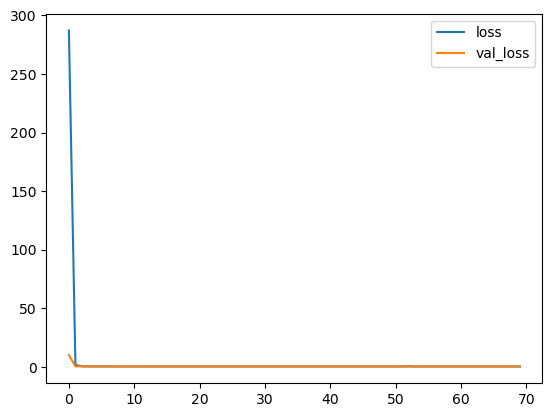

In [45]:
loss.plot();

In [46]:
prediction =(tfmodel.predict(X_test)>0.5).astype("int")


In [47]:
prediction

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [48]:
print(metrics.accuracy_score(y_test,prediction))

0.793939393939394
